In [1]:
from pyslds.models import *
import numpy as np
import scipy.io
from pybasicbayes.util.text import progprint_xrange
import matplotlib.pyplot as plt

(20, 221)


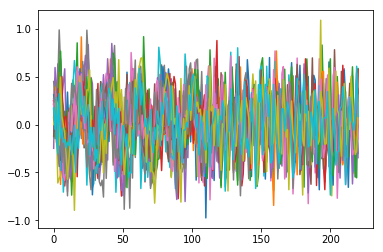

In [2]:
data = scipy.io.loadmat("test_data_N_20_M_221_sigma_0.200000.mat")
X = data['X']
print(X.shape)
N = X.shape[0]

plt.plot(X.T)
plt.show()

In [3]:
Kmax = 2 # number of hidden states
r = N #X.shape[0]

In [4]:
model = DefaultSLDS(K=Kmax, D_obs=N, D_latent=r, Cs=[np.eye(N) for _ in range(Kmax)])
model.add_data(X.T)
model.resample_states()

.........................  [  25/200,    0.02sec avg, ETA 4.01 ]
.........................  [  50/200,    0.02sec avg, ETA 3.27 ]
.........................  [  75/200,    0.02sec avg, ETA 2.65 ]
.........................  [ 100/200,    0.02sec avg, ETA 2.09 ]
.........................  [ 125/200,    0.02sec avg, ETA 1.57 ]
.........................  [ 150/200,    0.02sec avg, ETA 1.06 ]
.........................  [ 175/200,    0.02sec avg, ETA 0.53 ]
.........................  [ 200/200,    0.02sec avg, ETA 0.00 ]

   0.02sec avg, 4.20 total



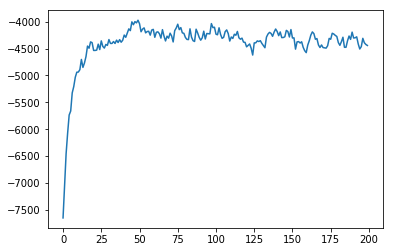

In [5]:
# Init with Gibbs sampler
N_samples = 200
def update(model):
    model.resample_model()
    return model.log_likelihood()

lls = [update(model) for _ in progprint_xrange(N_samples)]

plt.plot(lls)

In [6]:
model._init_mf_from_gibbs()
vlbs = []
for _ in progprint_xrange(100):
    model.VBEM_step()
    vlbs.append(model.VBEM_ELBO())
    if len(vlbs) > 1:
        assert vlbs[-1] > vlbs[-2] - 1e-8
        
model.VBEM_step
plt.plot(vlbs)

AttributeError: 'HMMSLDS' object has no attribute 'VBEM_step'

In [ ]:
model.states_list[0].stateseq